## Distributions in Machine Learning

### Uniform Distribution

The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
u = np.random.uniform(size = 10000)
u

array([0.58943283, 0.06180314, 0.74896704, ..., 0.55196798, 0.08661289,
       0.69879172], shape=(10000,))

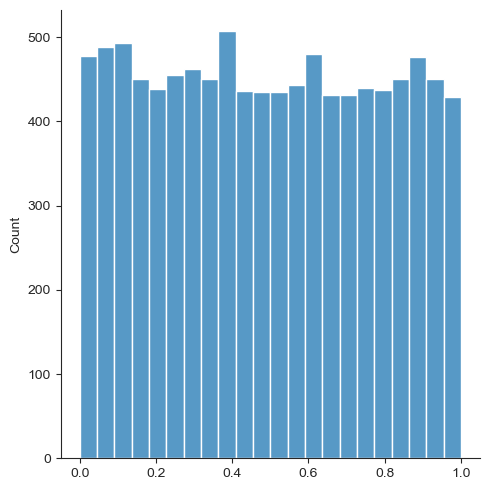

In [3]:
sns.set_style('ticks')
_ = sns.displot(x = u)

#### Real world example includes:

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (early 19th c. German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**:

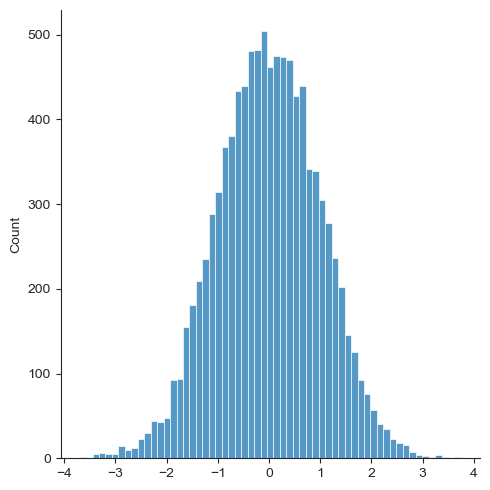

In [4]:
x = np.random.normal(size=10000)
_ = sns.displot(x = x)

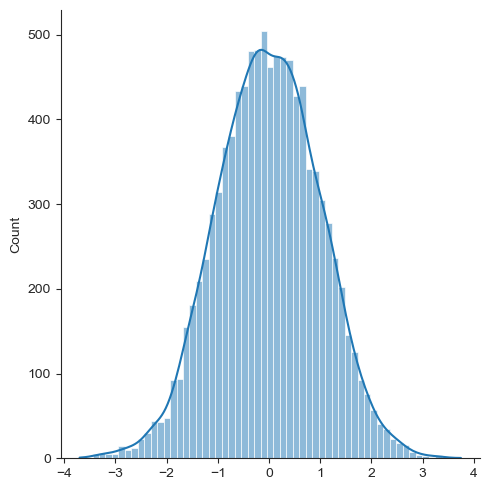

In [ ]:
# KDE - Kernel Density Estimation - smoothing the data using a kernel function 

_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [6]:
np.mean(x)

np.float64(-0.009606626894500288)

In [7]:
np.std(x)

np.float64(0.9964248983345582)

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the *math calligraphy* font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$.

(N.B.: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.)

---

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

---

Real-world examples include:

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT




In [8]:
n_experiments = 10000
head_counts = [np.random.binomial(100, 0.5) for _ in range(n_experiments)]
heads, event_count = np.unique(head_counts, return_counts=True)
event_prob = event_count / n_experiments

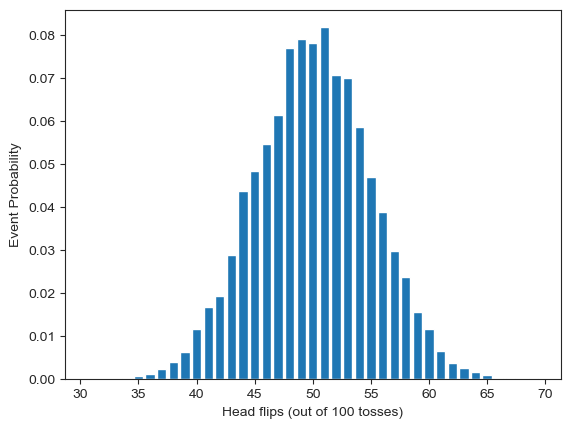

In [9]:
plt.bar(heads, event_prob)
_ = plt.xlabel("Head flips (out of 100 tosses)")
_ = plt.ylabel("Event Probability")